# Importing Libraries

In [9]:
import pandas as pd # data preprocessing
import itertools # confusion matrix
import string
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
# To show all the rows of pandas dataframe
pd.set_option('display.max_rows', None)

# Importing the Dataset

In [10]:
df = pd.read_csv('/Users/akshitkamboj/Downloads/drugsCom_raw/drugsComTrain_raw.tsv', sep='\t')

In [127]:
df.to_csv('NLP_Dataset.csv')

# Studying the Dataset

In [3]:
df.head()

Unnamed: 0                  drugName                     condition  \
0      206461                 Valsartan  Left Ventricular Dysfunction   
1       95260                Guanfacine                          ADHD   
2       92703                    Lybrel                 Birth Control   
3      138000                Ortho Evra                 Birth Control   
4       35696  Buprenorphine / naloxone             Opiate Dependence   

                                              review  rating  \
0  "It has no side effect, I take it in combinati...     9.0   
1  "My son is halfway through his fourth week of ...     8.0   
2  "I used to take another oral contraceptive, wh...     5.0   
3  "This is my first time using any form of birth...     8.0   
4  "Suboxone has completely turned my life around...     9.0   

                date  usefulCount  
0       May 20, 2012           27  
1     April 27, 2010          192  
2  December 14, 2009           17  
3   November 3, 2015           10  
4  November 27, 2016           37

In [4]:
df.condition.value_counts()

Birth Control                                                          28788
Depression                                                              9069
Pain                                                                    6145
Anxiety                                                                 5904
Acne                                                                    5588
Bipolar Disorde                                                         4224
Insomnia                                                                3673
Weight Loss                                                             3609
Obesity                                                                 3568
ADHD                                                                    3383
Diabetes, Type 2                                                        2554
Emergency Contraception                                                 2463
High Blood Pressure                                                     2321

In [11]:
df_train = df[(df['condition']=='Birth Control') | (df['condition']=='Depression') | (df['condition']=='High Blood Pressure')|(df['condition']=='Diabetes, Type 2')]

In [7]:
df.shape

(161297, 7)

In [8]:
df_train.shape

(42732, 7)

In [12]:
X = df_train.drop(['Unnamed: 0','drugName','rating','date','usefulCount'],axis=1)

In [10]:
X.head()

condition                                             review
2   Birth Control  "I used to take another oral contraceptive, wh...
3   Birth Control  "This is my first time using any form of birth...
9   Birth Control  "I had been on the pill for many years. When m...
11     Depression  "I have taken anti-depressants for years, with...
14  Birth Control  "Started Nexplanon 2 months ago because I have...

In [12]:
df_train.head()

Unnamed: 0                            drugName      condition  \
2        92703                              Lybrel  Birth Control   
3       138000                          Ortho Evra  Birth Control   
9        48928  Ethinyl estradiol / levonorgestrel  Birth Control   
11       75612                      L-methylfolate     Depression   
14       98494                           Nexplanon  Birth Control   

                                               review  rating  \
2   "I used to take another oral contraceptive, wh...     5.0   
3   "This is my first time using any form of birth...     8.0   
9   "I had been on the pill for many years. When m...     8.0   
11  "I have taken anti-depressants for years, with...    10.0   
14  "Started Nexplanon 2 months ago because I have...     3.0   

                 date  usefulCount  
2   December 14, 2009           17  
3    November 3, 2015           10  
9    December 8, 2016            1  
11      March 9, 2017           54  
14     August 7, 2014           10

# Exploratory Data Analysis

In [13]:
X.condition.value_counts()

Birth Control          28788
Depression              9069
Diabetes, Type 2        2554
High Blood Pressure     2321
Name: condition, dtype: int64

In [14]:
X.head()

condition                                             review
2   Birth Control  "I used to take another oral contraceptive, wh...
3   Birth Control  "This is my first time using any form of birth...
9   Birth Control  "I had been on the pill for many years. When m...
11     Depression  "I have taken anti-depressants for years, with...
14  Birth Control  "Started Nexplanon 2 months ago because I have...

# Segregating the Dataframe for Analyzing Individual Conditions

In [14]:
X_birth = X[(X['condition'] == 'Birth Control')]
X_dep = X[(X['condition'] == 'Depression')]
X_bp = X[(X['condition'] == 'High Blood Pressure')]
X_diab = X[(X['condition'] == 'Diabetes, Type 2')]

In [15]:
X_birth.head()

condition                                             review
2   Birth Control  "I used to take another oral contraceptive, wh...
3   Birth Control  "This is my first time using any form of birth...
9   Birth Control  "I had been on the pill for many years. When m...
14  Birth Control  "Started Nexplanon 2 months ago because I have...
22  Birth Control  "Nexplanon does its job. I can have worry free...

# Importing the WordCloud Library

In [16]:
from wordcloud import WordCloud

# WordCloud for Birth Control

Text(0.5, 1.0, 'Word cloud for Birth control')

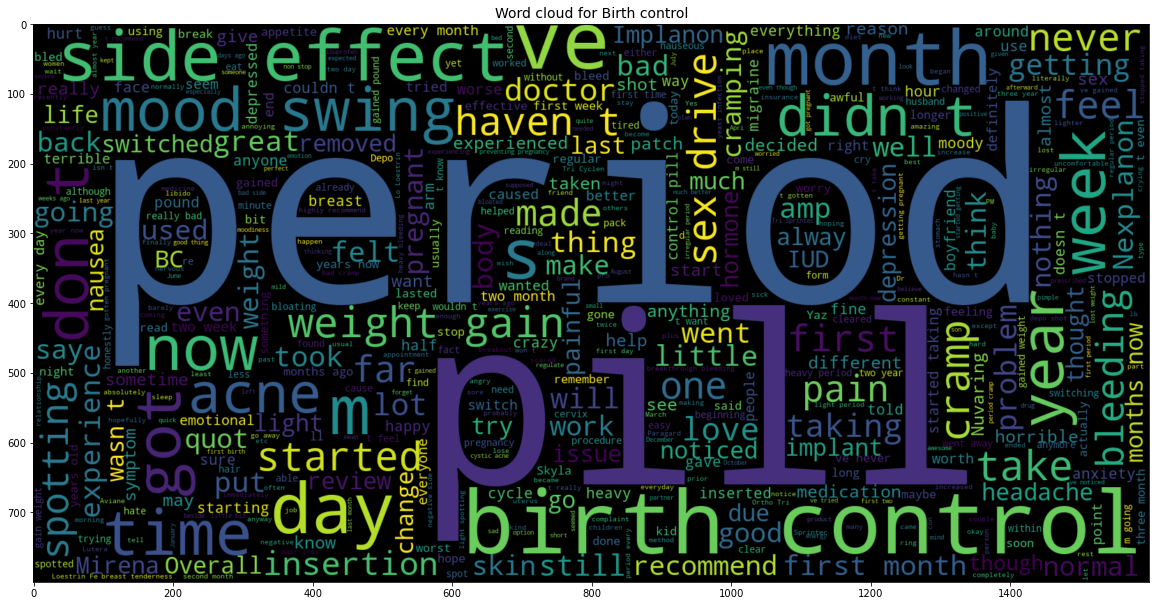

In [17]:
plt.figure(figsize = (20,20)) # Text that is Fake News Headlines
wc = WordCloud(max_words = 500 , width = 1600 , height = 800).generate(" ".join(X_birth.review))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('Word cloud for Birth control',fontsize=14)

# WordCloud for Depression

Text(0.5, 1.0, 'Word cloud for Depression')

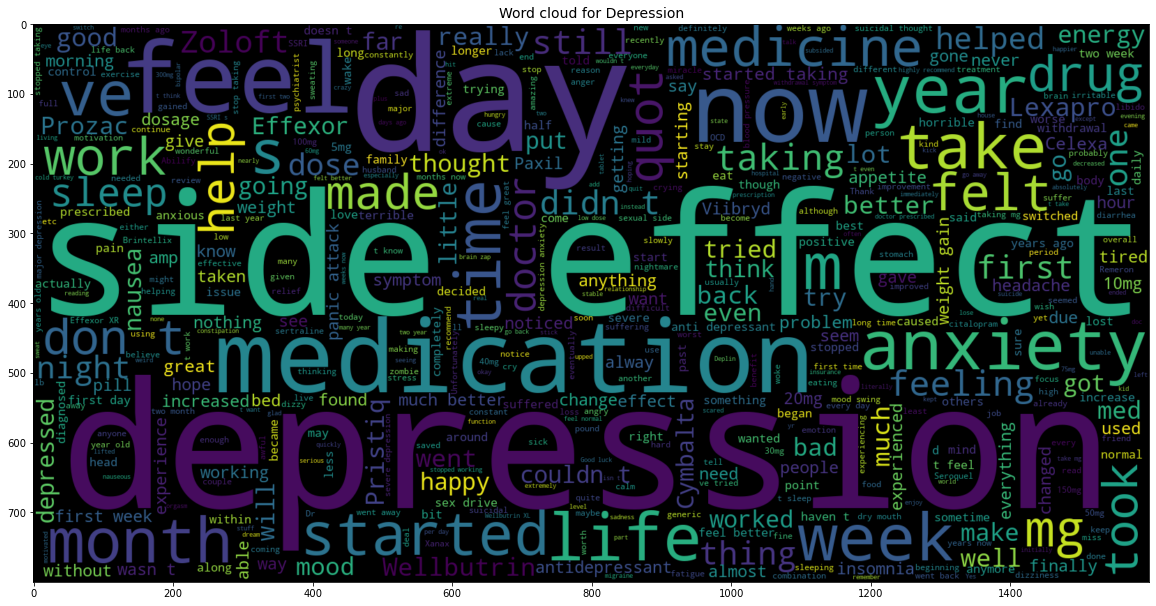

In [18]:
plt.figure(figsize = (20,20)) # Text that is Fake News Headlines
wc = WordCloud(max_words = 500 , width = 1600 , height = 800).generate(" ".join(X_dep.review))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('Word cloud for Depression',fontsize=14)

# WordCloud for Blood Pressure

Text(0.5, 1.0, 'Word cloud for High Blood Pressure')

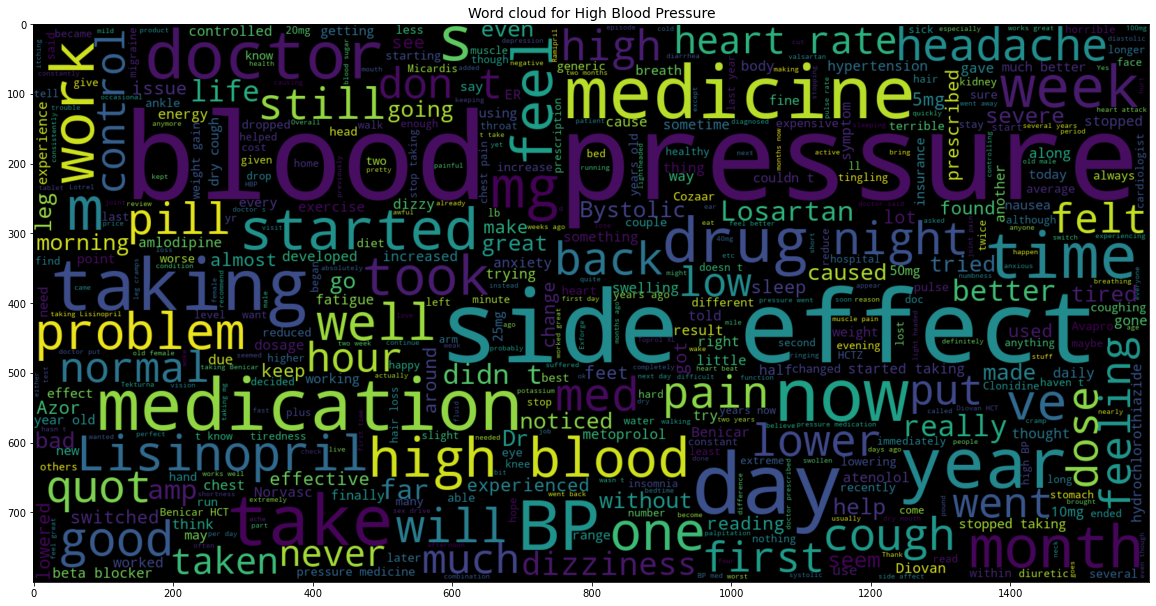

In [19]:
plt.figure(figsize = (20,20)) # Text that is Fake News Headlines
wc = WordCloud(max_words = 500 , width = 1600 , height = 800).generate(" ".join(X_bp.review))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('Word cloud for High Blood Pressure',fontsize=14)

# WordCloud for Diabetes Type 2

Text(0.5, 1.0, 'Word cloud for Diabetes Type 2')

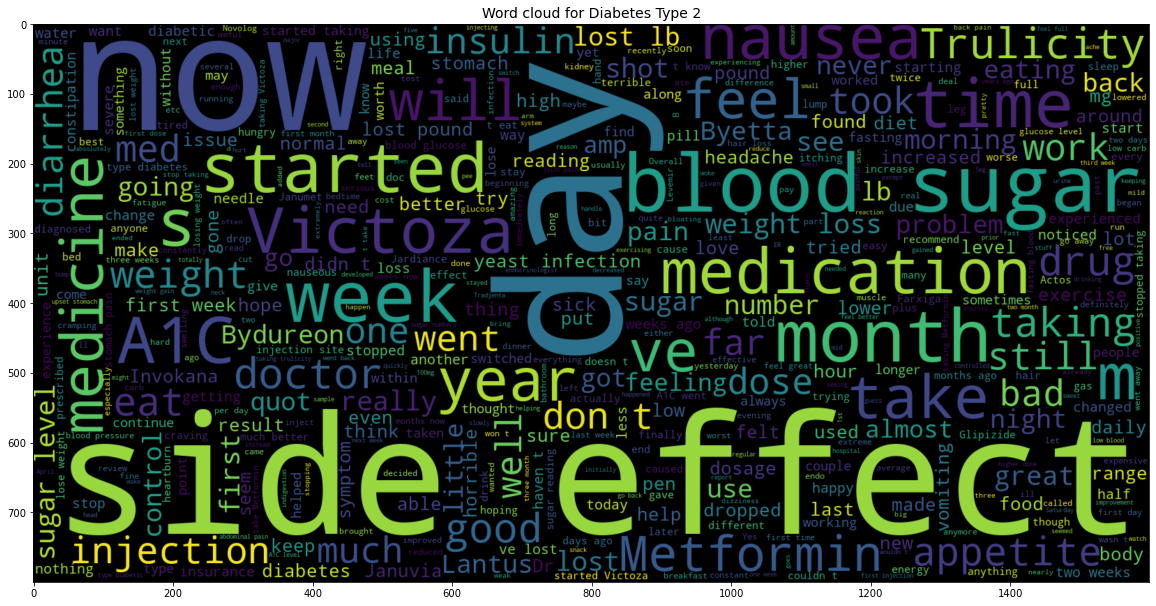

In [20]:
plt.figure(figsize = (20,20)) # Text that is Fake News Headlines
wc = WordCloud(max_words = 500 , width = 1600 , height = 800).generate(" ".join(X_diab.review))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('Word cloud for Diabetes Type 2',fontsize=14)

# Data Preprocessing

In [29]:
X['review'][2]

'"I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge.\r\nThe positive side is that I didn&#039;t have any other side effects. The idea of being period free was so tempting... Alas."'

In [33]:
X['review'][11]

'"I have taken anti-depressants for years, with some improvement but mostly moderate to severe side affects, which makes me go off them.\r\n\r\nI only take Cymbalta now mostly for pain.\r\n\r\nWhen I began Deplin, I noticed a major improvement overnight. More energy, better disposition, and no sinking to the low lows of major depression. I have been taking it for about 3 months now and feel like a normal person for the first time ever. Best thing, no side effects."'

# Removing Double Quotes from all the Reviews present in the Dataset

In [21]:
for i, col in enumerate(X.columns):
    X.iloc[:, i] = X.iloc[:, i].str.replace('"', '')

# Setting the Width of the Column to Maximum

In [22]:
pd.set_option('max_colwidth', -1)

/var/folders/zl/72cz_ww15_7g7njpyd4dg8zr0000gp/T/ipykernel_39466/3633274849.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('max_colwidth', -1)


In [39]:
X.head()

condition  \
2   Birth Control   
3   Birth Control   
9   Birth Control   
11  Depression      
14  Birth Control   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                review  
2   I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge.\r\nThe positive side is that I didn&#039;t have any other side effects. The idea of being period free was so tempting... Alas.                                 
3   This is my first time using any form of birth control. I&#039;m glad I went with the patch, I have been on it for 8 months. At first It decreased my libido but that subsided. The only downside is that it made my periods longer (5-6 days to be exact) I used to only have periods for 3-4 days max also made my cramps intense for the first two days of my period, I never had cramps before using birth control. Other than that in happy with the patch                                                                                                                                                                                                                                                                                                                                                      
9   I had been on the pill for many years. When my doctor changed my RX to chateal, it was as effective. It really did help me by completely clearing my acne, this takes about 6 months though. I did not gain extra weight, or develop any emotional health issues. I stopped taking it bc I started using a more natural method of birth control, but started to take it bc I hate that my acne came back at age 28. I really hope symptoms like depression, or weight gain do not begin to affect me as I am older now. I&#039;m also naturally moody, so this may worsen things. I was in a negative mental rut today. Also I hope this doesn&#039;t push me over the edge, as I believe I am depressed. Hopefully it&#039;ll be just like when I was younger.                                                     
11  I have taken anti-depressants for years, with some improvement but mostly moderate to severe side affects, which makes me go off them.\r\n\r\nI only take Cymbalta now mostly for pain.\r\n\r\nWhen I began Deplin, I noticed a major improvement overnight. More energy, better disposition, and no sinking to the low lows of major depression. I have been taking it for about 3 months now and feel like a normal person for the first time ever. Best thing, no side effects.                                                                                                                                                                                                                                               

# Removing the StopWords

## Importing the StopWords Library

In [38]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/akshitkamboj/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## StopWords in the English Language

In [40]:
from nltk.corpus import stopwords

In [41]:
stop = stopwords.words('english')

In [42]:
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

# Stemming

## Importing the PorterStemmer Library

In [26]:
from nltk.stem import PorterStemmer

In [27]:
porter = PorterStemmer()

## Trying out Stemming for Random Examples

In [28]:
print(porter.stem("sportingly"))
print(porter.stem("very"))
print(porter.stem("troubled"))

sportingli
veri
troubl


# Lemmatization

## Importing the WordNetLemmatizer Library

In [29]:
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/akshitkamboj/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [30]:
lemmatizer = WordNetLemmatizer()

## Trying out Lemmatization for Random Examples

In [31]:
print(lemmatizer.lemmatize("sportingly"))
print(lemmatizer.lemmatize("very"))
print(lemmatizer.lemmatize("troubled"))

sportingly
very
troubled


# Converting the Reviews to Individual Important Words

## Importing the BeautifulSoup and Re Libraries

In [32]:
from bs4 import BeautifulSoup
import re

## Creating a Function for the Required Conversion

In [33]:
def review_to_words(raw_review):
    # 1. Delete HTML 
    review_text = BeautifulSoup(raw_review, 'html.parser').get_text()
    # 2. Make a space
    letters_only = re.sub('[^a-zA-Z]', ' ', review_text)
    # 3. lower letters
    words = letters_only.lower().split()
    # 5. Stopwords 
    meaningful_words = [w for w in words if not w in stop]
    # 6. lemmitization
    lemmitize_words = [lemmatizer.lemmatize(w) for w in meaningful_words]
    # 7. space join words
    return( ' '.join(lemmitize_words))

In [43]:
X['review_clean'] = X['review'].apply(review_to_words)

In [53]:
X.head()

condition  \
2   Birth Control   
3   Birth Control   
9   Birth Control   
11  Depression      
14  Birth Control   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                review  \
2   I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge.\r\nThe positive side is that I didn&#039;t have any other side effects. The idea of being period free was so tempting... Alas.                                  
3   This is my first time using any form of birth control. I&#039;m glad I went with the patch, I have been on it for 8 months. At first It decreased my libido but that subsided. The only downside is that it made my periods longer (5-6 days to be exact) I used to only have periods for 3-4 days max also made my cramps intense for the first two days of my period, I never had cramps before using birth control. Other than that in happy with the patch                                                                                                                                                                                                                                                                                                                                                       
9   I had been on the pill for many years. When my doctor changed my RX to chateal, it was as effective. It really did help me by completely clearing my acne, this takes about 6 months though. I did not gain extra weight, or develop any emotional health issues. I stopped taking it bc I started using a more natural method of birth control, but started to take it bc I hate that my acne came back at age 28. I really hope symptoms like depression, or weight gain do not begin to affect me as I am older now. I&#039;m also naturally moody, so this may worsen things. I was in a negative mental rut today. Also I hope this doesn&#039;t push me over the edge, as I believe I am depressed. Hopefully it&#039;ll be just like when I was younger.                                                      
11  I have taken anti-depressants for years, with some improvement but mostly moderate to severe side affects, which makes me go off them.\r\n\r\nI only take Cymbalta now mostly for pain.\r\n\r\nWhen I began Deplin, I noticed a major improvement overnight. More energy, better disposition, and no sinking to the low lows of major depression. I have been taking it for about 3 months now and feel like a normal person for the first time ever. Best thing, no side effects.                                                                                                                                                                                                                                           

# Creating Features and Target Variables

In [51]:
X_feat = X['review_clean']
y = X['condition']

In [52]:
X_feat_2 = X['tokenized']

KeyError: 'tokenized'

# Performing the Train - Test Split

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X_feat, y, stratify = y, test_size = 0.2, random_state=0)

In [50]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_feat_2, y, stratify = y, test_size = 0.2, random_state=0)

NameError: name 'X_feat_2' is not defined

# Creating a Function for Plotting Confusion Matrix

In [81]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Bag of Words Approach

In [55]:
count_vectorizer = CountVectorizer(stop_words = 'english')
count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test)

In [102]:
count_train

<34185x15995 sparse matrix of type '<class 'numpy.int64'>'
	with 1092752 stored elements in Compressed Sparse Row format>

## Logistic Regression Model

In [67]:
from sklearn.metrics import f1_score, accuracy_score, plot_confusion_matrix, auc, confusion_matrix, precision_score, recall_score

In [56]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(random_state = 2)
lr_model.fit(count_train, y_train)

/Users/akshitkamboj/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=2)

/Users/akshitkamboj/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/Users/akshitkamboj/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/Users/akshitkamboj/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


accuracy:  97.999297999298
precision:  96.33281794225196
recall:  94.5221264172688
f1_score:  0.9539153874623753
Confusion matrix, without normalization


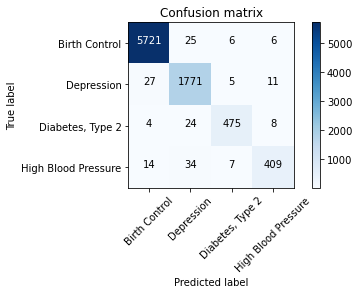

In [88]:
preds = lr_model.predict(count_test)
score = metrics.accuracy_score(y_test, preds)
precision = precision_score(y_test, preds, pos_label='positive', average= 'macro')
recall = recall_score(y_test, preds, pos_label='positive', average='macro')
f1 = f1_score(y_test, preds, pos_label='positive', average='macro')

print("accuracy: ", score * 100)
print("precision: ", precision * 100)
print("recall: ", recall * 100)
print("f1_score: ", f1)

cm = metrics.confusion_matrix(y_test, preds, labels=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])

## Decision Tree Classifier

In [60]:
from sklearn.tree import DecisionTreeClassifier

/Users/akshitkamboj/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/Users/akshitkamboj/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/Users/akshitkamboj/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


accuracy:  95.98689598689599
precision:  92.37178661597851
recall:  90.99717124649263
f1_score:  0.9166167845000007
Confusion matrix, without normalization


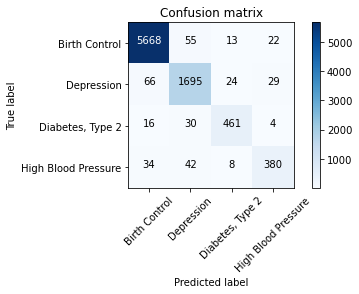

In [89]:
dt_model = DecisionTreeClassifier(random_state = 2)
dt_model.fit(count_train, y_train)

preds = dt_model.predict(count_test)
score = metrics.accuracy_score(y_test, preds)
precision = precision_score(y_test, preds, pos_label='positive', average= 'macro')
recall = recall_score(y_test, preds, pos_label='positive', average='macro')
f1 = f1_score(y_test, preds, pos_label='positive', average='macro')

print("accuracy: ", score * 100)
print("precision: ", precision * 100)
print("recall: ", recall * 100)
print("f1_score: ", f1)

cm = metrics.confusion_matrix(y_test, preds, labels=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])

## Random Forest Classifier

In [63]:
from sklearn.ensemble import RandomForestClassifier

/Users/akshitkamboj/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/Users/akshitkamboj/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/akshitkamboj/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/Users/akshitkamboj/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:

accuracy:  67.36866736866737
precision:  16.842166842166844
recall:  25.0
f1_score:  0.20125830129325412
Confusion matrix, without normalization


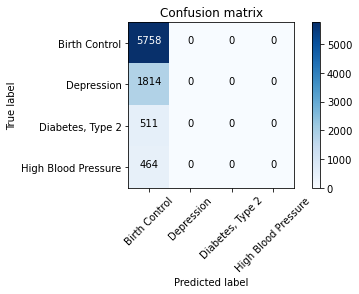

In [95]:
random_model = RandomForestClassifier(max_depth = 2, random_state = 2)
random_model.fit(count_train, y_train)

preds = random_model.predict(count_test)
score = metrics.accuracy_score(y_test, preds)
precision = precision_score(y_test, preds, pos_label='positive', average= 'macro')
recall = recall_score(y_test, preds, pos_label='positive', average='macro')
f1 = f1_score(y_test, preds, pos_label='positive', average='macro')

print("accuracy: ", score * 100)
print("precision: ", precision * 100)
print("recall: ", recall * 100)
print("f1_score: ", f1)

cm = metrics.confusion_matrix(y_test, preds, labels=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])

## Naive Bayes Machine Learning Model

/Users/akshitkamboj/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/Users/akshitkamboj/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/akshitkamboj/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/Users/akshitkamboj/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:

accuracy:  97.01649701649701
precision:  16.842166842166844
recall:  25.0
f1_score:  0.20125830129325412
Confusion matrix, without normalization


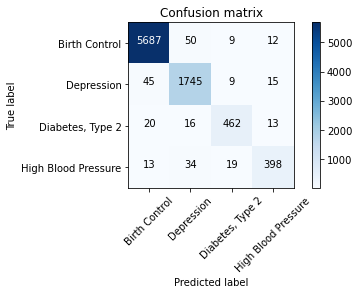

In [96]:
mnb = MultinomialNB()
mnb.fit(count_train, y_train)
pred = mnb.predict(count_test)

score = metrics.accuracy_score(y_test, pred)
precision = precision_score(y_test, preds, pos_label='positive', average= 'macro')
recall = recall_score(y_test, preds, pos_label='positive', average='macro')
f1 = f1_score(y_test, preds, pos_label='positive', average='macro')

print("accuracy: ", score * 100)
print("precision: ", precision * 100)
print("recall: ", recall * 100)
print("f1_score: ", f1)

cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])

## Passive Aggresive Classifier Machine Learning Model

/Users/akshitkamboj/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/Users/akshitkamboj/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/akshitkamboj/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/Users/akshitkamboj/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:

accuracy:  97.83549783549783
precision:  16.842166842166844
recall:  25.0
f1_score:  0.20125830129325412
Confusion matrix, without normalization


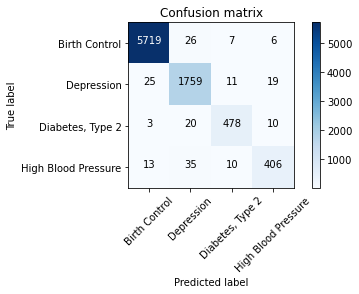

In [97]:
from sklearn.linear_model import PassiveAggressiveClassifier,LogisticRegression

passive = PassiveAggressiveClassifier()
passive.fit(count_train, y_train)
pred = passive.predict(count_test)

score = metrics.accuracy_score(y_test, pred)

precision = precision_score(y_test, preds, pos_label='positive', average= 'macro')
recall = recall_score(y_test, preds, pos_label='positive', average='macro')
f1 = f1_score(y_test, preds, pos_label='positive', average='macro')

print("accuracy: ", score * 100)
print("precision: ", precision * 100)
print("recall: ", recall * 100)
print("f1_score: ", f1)

cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])

# TFIDF Approach

In [99]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8)
tfidf_train_2 = tfidf_vectorizer.fit_transform(X_train)
tfidf_test_2 = tfidf_vectorizer.transform(X_test)

## Logistic Regression Model

In [100]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(random_state = 2)
lr_model.fit(tfidf_train_2, y_train)

/Users/akshitkamboj/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=2)

/Users/akshitkamboj/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/Users/akshitkamboj/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/Users/akshitkamboj/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


accuracy:  97.73019773019773
precision:  96.31748528241695
recall:  93.38077371026226
f1_score:  0.9476169955557738
Confusion matrix, without normalization


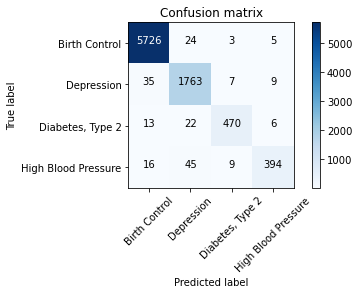

In [101]:
preds = lr_model.predict(tfidf_test_2)
score = metrics.accuracy_score(y_test, preds)
precision = precision_score(y_test, preds, pos_label='positive', average= 'macro')
recall = recall_score(y_test, preds, pos_label='positive', average='macro')
f1 = f1_score(y_test, preds, pos_label='positive', average='macro')

print("accuracy: ", score * 100)
print("precision: ", precision * 100)
print("recall: ", recall * 100)
print("f1_score: ", f1)

cm = metrics.confusion_matrix(y_test, preds, labels=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])

## Decision Tree Classifier

In [102]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state = 2)
dt_model.fit(tfidf_train_2, y_train)

DecisionTreeClassifier(random_state=2)

/Users/akshitkamboj/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/Users/akshitkamboj/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/Users/akshitkamboj/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


accuracy:  95.51889551889552
precision:  91.4858768815889
recall:  90.18401507689009
f1_score:  0.9081030705620167
Confusion matrix, without normalization


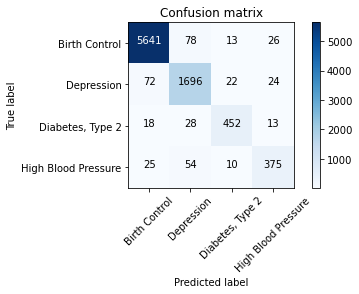

In [103]:
preds = dt_model.predict(tfidf_test_2)
score = metrics.accuracy_score(y_test, preds)
precision = precision_score(y_test, preds, pos_label='positive', average= 'macro')
recall = recall_score(y_test, preds, pos_label='positive', average='macro')
f1 = f1_score(y_test, preds, pos_label='positive', average='macro')

print("accuracy: ", score * 100)
print("precision: ", precision * 100)
print("recall: ", recall * 100)
print("f1_score: ", f1)

cm = metrics.confusion_matrix(y_test, preds, labels=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])

## Random Forest Classifier

In [104]:
from sklearn.ensemble import RandomForestClassifier

random_model = RandomForestClassifier(max_depth = 2, random_state = 2)
random_model.fit(tfidf_train_2, y_train)

RandomForestClassifier(max_depth=2, random_state=2)

/Users/akshitkamboj/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/Users/akshitkamboj/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/akshitkamboj/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/Users/akshitkamboj/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:

accuracy:  67.36866736866737
precision:  16.842166842166844
recall:  25.0
f1_score:  0.20125830129325412
Confusion matrix, without normalization


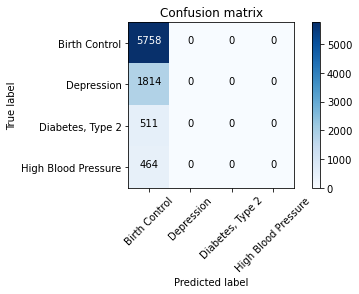

In [105]:
preds = random_model.predict(tfidf_test_2)
score = metrics.accuracy_score(y_test, preds)
precision = precision_score(y_test, preds, pos_label='positive', average= 'macro')
recall = recall_score(y_test, preds, pos_label='positive', average='macro')
f1 = f1_score(y_test, preds, pos_label='positive', average='macro')

print("accuracy: ", score * 100)
print("precision: ", precision * 100)
print("recall: ", recall * 100)
print("f1_score: ", f1)

cm = metrics.confusion_matrix(y_test, preds, labels=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])

## Naive Bayes Machine Learning Model

/Users/akshitkamboj/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/Users/akshitkamboj/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/akshitkamboj/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/Users/akshitkamboj/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:

accuracy:  92.14929214929215
precision:  16.842166842166844
recall:  25.0
f1_score:  0.20125830129325412
Confusion matrix, without normalization


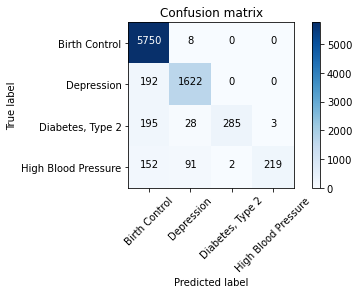

In [106]:
mnb_tf = MultinomialNB()
mnb_tf.fit(tfidf_train_2, y_train)
pred = mnb_tf.predict(tfidf_test_2)

score = metrics.accuracy_score(y_test, pred)
precision = precision_score(y_test, preds, pos_label='positive', average= 'macro')
recall = recall_score(y_test, preds, pos_label='positive', average='macro')
f1 = f1_score(y_test, preds, pos_label='positive', average='macro')

print("accuracy: ", score * 100)
print("precision: ", precision * 100)
print("recall: ", recall * 100)
print("f1_score: ", f1)

cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])

## Passive Aggressive Classifier Machine Learning Model

/Users/akshitkamboj/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/Users/akshitkamboj/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/akshitkamboj/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/Users/akshitkamboj/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:

accuracy:  98.15139815139815
precision:  16.842166842166844
recall:  25.0
f1_score:  0.20125830129325412
Confusion matrix, without normalization


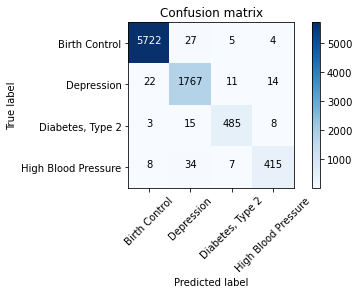

In [107]:
passive = PassiveAggressiveClassifier()
passive.fit(tfidf_train_2, y_train)
pred = passive.predict(tfidf_test_2)

score = metrics.accuracy_score(y_test, pred)
precision = precision_score(y_test, preds, pos_label='positive', average= 'macro')
recall = recall_score(y_test, preds, pos_label='positive', average='macro')
f1 = f1_score(y_test, preds, pos_label='positive', average='macro')

print("accuracy: ", score * 100)
print("precision: ", precision * 100)
print("recall: ", recall * 100)
print("f1_score: ", f1)

cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])

# TFIDF: Bigrams Approach

In [108]:
tfidf_vectorizer2 = TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range=(1,2))
tfidf_train_2 = tfidf_vectorizer2.fit_transform(X_train)
tfidf_test_2 = tfidf_vectorizer2.transform(X_test)

## Logistic Regression Model

In [109]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(random_state = 2)
lr_model.fit(tfidf_train_2, y_train)

/Users/akshitkamboj/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=2)

/Users/akshitkamboj/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/Users/akshitkamboj/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/Users/akshitkamboj/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


accuracy:  97.4961974961975
precision:  96.93105448487326
recall:  91.82083132284801
f1_score:  0.9414845762776035
Confusion matrix, without normalization


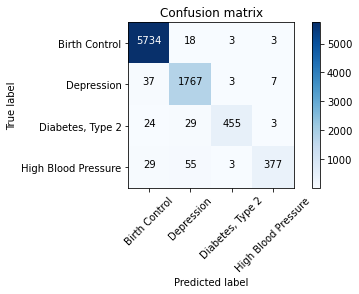

In [110]:
preds = lr_model.predict(tfidf_test_2)
score = metrics.accuracy_score(y_test, preds)
precision = precision_score(y_test, preds, pos_label='positive', average= 'macro')
recall = recall_score(y_test, preds, pos_label='positive', average='macro')
f1 = f1_score(y_test, preds, pos_label='positive', average='macro')

print("accuracy: ", score * 100)
print("precision: ", precision * 100)
print("recall: ", recall * 100)
print("f1_score: ", f1)

cm = metrics.confusion_matrix(y_test, preds, labels=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])

## Decision Tree Classifier

In [111]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state = 2)
dt_model.fit(tfidf_train_2, y_train)

DecisionTreeClassifier(random_state=2)

/Users/akshitkamboj/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/Users/akshitkamboj/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/Users/akshitkamboj/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


accuracy:  95.55399555399555
precision:  90.75672540789122
recall:  90.1417962197151
f1_score:  0.9044416397216362
Confusion matrix, without normalization


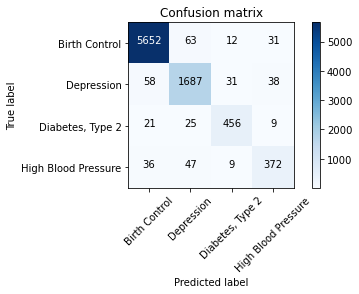

In [112]:
preds = dt_model.predict(tfidf_test_2)
score = metrics.accuracy_score(y_test, preds)
precision = precision_score(y_test, preds, pos_label='positive', average= 'macro')
recall = recall_score(y_test, preds, pos_label='positive', average='macro')
f1 = f1_score(y_test, preds, pos_label='positive', average='macro')

print("accuracy: ", score * 100)
print("precision: ", precision * 100)
print("recall: ", recall * 100)
print("f1_score: ", f1)

cm = metrics.confusion_matrix(y_test, preds, labels=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])

## Random Forest Classifier

In [113]:
from sklearn.ensemble import RandomForestClassifier

random_model = RandomForestClassifier(max_depth = 2, random_state = 2)
random_model.fit(tfidf_train_2, y_train)

RandomForestClassifier(max_depth=2, random_state=2)

/Users/akshitkamboj/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/Users/akshitkamboj/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/akshitkamboj/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/Users/akshitkamboj/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:

accuracy:  67.36866736866737
precision:  16.842166842166844
recall:  25.0
f1_score:  0.20125830129325412
Confusion matrix, without normalization


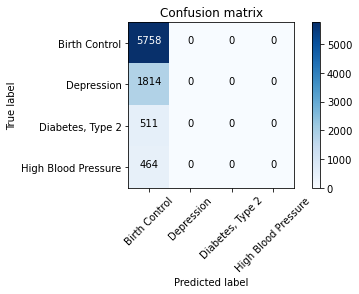

In [114]:
preds = random_model.predict(tfidf_test_2)
score = metrics.accuracy_score(y_test, preds)
precision = precision_score(y_test, preds, pos_label='positive', average= 'macro')
recall = recall_score(y_test, preds, pos_label='positive', average='macro')
f1 = f1_score(y_test, preds, pos_label='positive', average='macro')

print("accuracy: ", score * 100)
print("precision: ", precision * 100)
print("recall: ", recall * 100)
print("f1_score: ", f1)

cm = metrics.confusion_matrix(y_test, preds, labels=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])

## Passive Aggressive Classifier Machine Learning Model

/Users/akshitkamboj/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/Users/akshitkamboj/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/akshitkamboj/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/Users/akshitkamboj/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:

accuracy:  98.57259857259857
precision:  16.842166842166844
recall:  25.0
f1_score:  0.20125830129325412
Confusion matrix, without normalization


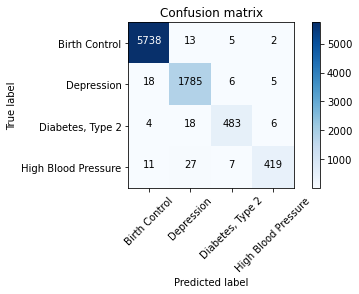

In [126]:
pass_tf = PassiveAggressiveClassifier()
pass_tf.fit(tfidf_train_2, y_train)
pred = pass_tf.predict(tfidf_test_2)

score = metrics.accuracy_score(y_test, pred)
precision = precision_score(y_test, preds, pos_label='positive', average= 'macro')
recall = recall_score(y_test, preds, pos_label='positive', average='macro')
f1 = f1_score(y_test, preds, pos_label='positive', average='macro')

print("accuracy: ", score * 100)
print("precision: ", precision * 100)
print("recall: ", recall * 100)
print("f1_score: ", f1)

cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])

# TFIDF : Trigrams Approach

In [117]:
tfidf_vectorizer3 = TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range=(1,3))
tfidf_train_3 = tfidf_vectorizer3.fit_transform(X_train)
tfidf_test_3 = tfidf_vectorizer3.transform(X_test)

## Logistic Regression Model

In [118]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(random_state = 2)
lr_model.fit(tfidf_train_3, y_train)

/Users/akshitkamboj/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=2)

/Users/akshitkamboj/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/Users/akshitkamboj/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/Users/akshitkamboj/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


accuracy:  97.08669708669709
precision:  96.65141087557558
recall:  90.26484249853183
f1_score:  0.931242799201532
Confusion matrix, without normalization


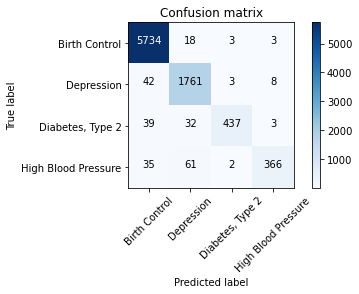

In [119]:
preds = lr_model.predict(tfidf_test_3)
score = metrics.accuracy_score(y_test, preds)
precision = precision_score(y_test, preds, pos_label='positive', average= 'macro')
recall = recall_score(y_test, preds, pos_label='positive', average='macro')
f1 = f1_score(y_test, preds, pos_label='positive', average='macro')

print("accuracy: ", score * 100)
print("precision: ", precision * 100)
print("recall: ", recall * 100)
print("f1_score: ", f1)

cm = metrics.confusion_matrix(y_test, preds, labels=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])

## Decision Tree Classifier

In [120]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state = 2)
dt_model.fit(tfidf_train_3, y_train)

DecisionTreeClassifier(random_state=2)

/Users/akshitkamboj/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/Users/akshitkamboj/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/Users/akshitkamboj/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


accuracy:  95.16789516789517
precision:  90.40467818218538
recall:  89.56932502062187
f1_score:  0.8998091451750506
Confusion matrix, without normalization


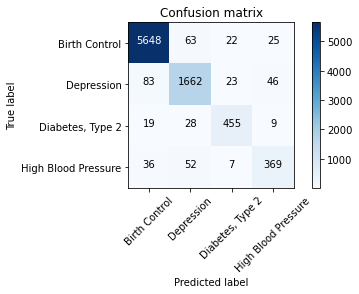

In [121]:
preds = dt_model.predict(tfidf_test_3)
score = metrics.accuracy_score(y_test, preds)
precision = precision_score(y_test, preds, pos_label='positive', average= 'macro')
recall = recall_score(y_test, preds, pos_label='positive', average='macro')
f1 = f1_score(y_test, preds, pos_label='positive', average='macro')

print("accuracy: ", score * 100)
print("precision: ", precision * 100)
print("recall: ", recall * 100)
print("f1_score: ", f1)

cm = metrics.confusion_matrix(y_test, preds, labels=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])

## Random Forest Classifier


In [122]:
from sklearn.ensemble import RandomForestClassifier

random_model = RandomForestClassifier(max_depth = 2, random_state = 2)
random_model.fit(tfidf_train_3, y_train)

RandomForestClassifier(max_depth=2, random_state=2)

/Users/akshitkamboj/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/Users/akshitkamboj/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/akshitkamboj/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/Users/akshitkamboj/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:

accuracy:  67.36866736866737
precision:  16.842166842166844
recall:  25.0
f1_score:  0.20125830129325412
Confusion matrix, without normalization


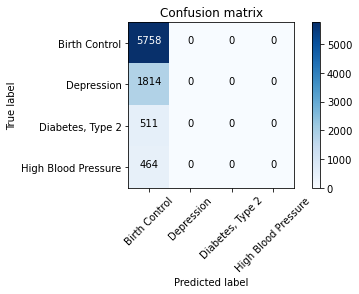

In [123]:
preds = random_model.predict(tfidf_test_3)
score = metrics.accuracy_score(y_test, preds)
precision = precision_score(y_test, preds, pos_label='positive', average= 'macro')
recall = recall_score(y_test, preds, pos_label='positive', average='macro')
f1 = f1_score(y_test, preds, pos_label='positive', average='macro')

print("accuracy: ", score * 100)
print("precision: ", precision * 100)
print("recall: ", recall * 100)
print("f1_score: ", f1)

cm = metrics.confusion_matrix(y_test, preds, labels=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])

## Passive Aggresive Classifier Machine Learning Model

/Users/akshitkamboj/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/Users/akshitkamboj/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/akshitkamboj/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/Users/akshitkamboj/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:

accuracy:  98.54919854919855
precision:  16.842166842166844
recall:  25.0
f1_score:  0.20125830129325412
Confusion matrix, without normalization


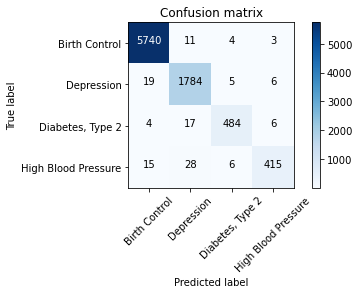

In [125]:
pass_tf = PassiveAggressiveClassifier()
pass_tf.fit(tfidf_train_3, y_train)
pred = pass_tf.predict(tfidf_test_3)

score = metrics.accuracy_score(y_test, pred)
precision = precision_score(y_test, preds, pos_label='positive', average= 'macro')
recall = recall_score(y_test, preds, pos_label='positive', average='macro')
f1 = f1_score(y_test, preds, pos_label='positive', average='macro')

print("accuracy: ", score * 100)
print("precision: ", precision * 100)
print("recall: ", recall * 100)
print("f1_score: ", f1)

cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])

# Most Important Features

## Creating a Function to find out the Most Important Features for a Class

In [75]:
def most_informative_feature_for_class(vectorizer, classifier, classlabel, n=10):
    labelid = list(classifier.classes_).index(classlabel)
    feature_names = vectorizer.get_feature_names()
    topn = sorted(zip(classifier.coef_[labelid], feature_names))[-n:]

    for coef, feat in topn:
        print (classlabel, feat, coef)

## Most Informative Features for the Class 'Birth Control'

In [76]:
most_informative_feature_for_class(tfidf_vectorizer, pass_tf, 'Birth Control')

/Users/akshitkamboj/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Birth Control comb 0.4720127099681046
Birth Control tricyclone 0.4974140077588484
Birth Control tricylcen 0.4974140077588484
Birth Control ridicuouls 0.4983274881511796
Birth Control correct 0.5039211682955163
Birth Control addon 0.5337468984655529
Birth Control packaged 0.5508445074536292
Birth Control tiny 0.7511792887278587
Birth Control commit 1.2615070905865524
Birth Control freeway 6.967233670813331


## Most Informative Features for the Class 'Depression'

In [77]:
most_informative_feature_for_class(tfidf_vectorizer, pass_tf, 'Depression')

Depression disastrous 0.5610141455646492
Depression therefor 0.5667422787148679
Depression sinnce 0.6209432290919888
Depression dine 0.6301281906803458
Depression strung 0.6816144502245127
Depression assaulted 0.8161105352717763
Depression apnea 0.9907391206945989
Depression subjective 1.0167604352220332
Depression significantly 1.031400523084562
Depression aliveness 3.4970775158595693


## Most Informative Features for the Class 'High Blood Pressure'

In [79]:
most_informative_feature_for_class(tfidf_vectorizer, pass_tf, 'High Blood Pressure')

High Blood Pressure folic 0.5687541542991048
High Blood Pressure fatter 0.5980695597759168
High Blood Pressure fattest 0.5980695597759168
High Blood Pressure barley 0.5988175372672144
High Blood Pressure fluctuation 0.6261564616448427
High Blood Pressure enforcement 0.7580806318169931
High Blood Pressure shine 0.7784413461337101
High Blood Pressure end 0.794302160719663
High Blood Pressure encouraged 0.8026496303800729
High Blood Pressure folk 1.0286862248749986


## Most Informative Features for the Class 'Diabetes, Type 2'

In [80]:
most_informative_feature_for_class(tfidf_vectorizer, pass_tf, 'Diabetes, Type 2')

Diabetes, Type 2 aesthetician 0.38016492811162167
Diabetes, Type 2 vastly 0.38091622734134306
Diabetes, Type 2 prom 0.4397735546882398
Diabetes, Type 2 escalated 0.4557924174937121
Diabetes, Type 2 base 0.47506082195743504
Diabetes, Type 2 fluctuation 0.4886636526923469
Diabetes, Type 2 proliferating 0.6250937296800293
Diabetes, Type 2 fot 0.7128178367456434
Diabetes, Type 2 orthotricyclenlo 0.7940459787993934
Diabetes, Type 2 problem 3.213303867390752


In [81]:
X.tail()

condition  \
161273  Birth Control         
161278  Diabetes, Type 2      
161286  Depression            
161290  High Blood Pressure   
161291  Birth Control         

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                review  \
161273  I have had the Nexplanon since Dec. 27, 2016 \r\r\nI got my first period at the end of January and it lasted about a month and a half. In March of 2017 I didn&#039;t bleed for close to three weeks and then started bleeding again March 28th and have been bleeding every since. I have gained about 13 lbs so far since getting the birth control. Although for now the weight gain isn&#039;t a deal breaker for me but the bleeding is..  I am trying to be very patient to see how my body adjusts to the implant. It has been three months so far and I have my fingers crossed that my cycle will go away for awhile.   
161278  I just got diagnosed with type 2. My doctor prescribed Invokana and metformin from the beginning. My sugars went down to normal by the second week. I  am losing so much weight. No side effects yet. Miracle medicine for me                                                                                                                                                                                                                                                                                                                                                                                                    
161286  This is the third med I&#039;ve tried for anxiety and mild depression. Been on it for a week and I hate it so much. I am so dizzy, I have major diarrhea and feel worse than I started. Contacting my doc in the am  and changing asap.                                                                                                                                                                                                                                                                                                                                                                                          
161290  I have only been on Tekturna for 9 days. The effect was immediate. I am also on a calcium channel blocker (Tiazac) and hydrochlorothiazide. I was put on Tekturna because of palpitations experienced with Diovan (ugly drug in my opinion, same company produces both however). The palpitations were pretty bad on Diovan, 24 hour monitor by EKG etc. After a few days of substituting Tekturna for Diovan, there are no more palpitations.                                                                                                                                                                                   
161291  This would be my second month on Junel. I&#039;ve been on Birth Control for about 10 years now. I changed due to spotting and increased mood swings with my previous birth control. Since the switch I have had shorter periods about 2-3 days, but I have gained major weight and increased appetite. I switched up my regular exercise routine and still have not managed to drop the extra 7 lbs ;(                                                                                                                                                                                                                           

                                                                                                                          

# Sample Predictions

accuracy:   0.982
Confusion matrix, without normalization


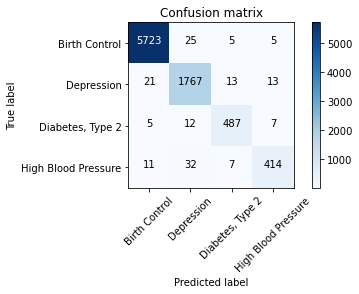

In [88]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8)
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

pass_tf = PassiveAggressiveClassifier()
pass_tf.fit(tfidf_train, y_train)
pred = pass_tf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])

In [89]:
text = ["I have only been on Tekturna for 9 days. The effect was immediate. I am also on a calcium channel blocker (Tiazac) and hydrochlorothiazide. I was put on Tekturna because of palpitations experienced with Diovan (ugly drug in my opinion, same company produces both however). The palpitations were pretty bad on Diovan, 24 hour monitor by EKG etc. After a few days of substituting Tekturna for Diovan, there are no more palpitations."]
test = tfidf_vectorizer.transform(text)
pred1 = pass_tf.predict(test)[0]
pred1

'High Blood Pressure'

In [90]:
text =["This is the third med I've tried for anxiety and mild depression. Been on it for a week and I hate it so much. I am so dizzy, I have major diarrhea and feel worse than I started. Contacting my doc in the am and changing asap."]
test = tfidf_vectorizer.transform(text)
pred1 = pass_tf.predict(test)[0]
pred1

'Depression'

In [104]:
text = ["I just got diagnosed with type 2. My doctor prescribed Invokana and metformin from the beginning. My sugars went down to normal by the second week. I am losing so much weight. No side effects yet. Miracle medicine for me"]
test = tfidf_vectorizer.transform(text)
pred1 = pass_tf.predict(test)[0]
pred1

'Diabetes, Type 2'

In [105]:
print("Hello World!!")

Hello World!!


In [107]:
conda install gensim

Solving environment: done

## Package Plan ##

  environment location: /Users/akshitkamboj/opt/anaconda3

  added / updated specs:
    - gensim


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2022.10.11 |       hecd8cb5_0         125 KB
    certifi-2022.9.24          |   py39hecd8cb5_0         155 KB
    conda-22.9.0               |   py39hecd8cb5_0         884 KB
    gensim-4.1.2               |   py39he9d5cce_0        18.3 MB
    openssl-1.1.1s             |       hca72f7f_0         2.8 MB
    smart_open-5.2.1           |   py39hecd8cb5_0          77 KB
    ------------------------------------------------------------
                                           Total:        22.3 MB

The following NEW packages will be INSTALLED:

  gensim             pkgs/main/osx-64::gensim-4.1.2-py39he9d5cce_0 None
  smart_open         pkgs/main/osx-64::smart_open-5.2.1-py39hecd8cb5_0

In [108]:
# conda install python-Levenshtein

Solving environment: done

## Package Plan ##

  environment location: /Users/akshitkamboj/opt/anaconda3

  added / updated specs:
    - python-levenshtein


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    python-levenshtein-0.12.2  |   py39h9ed2024_0          74 KB
    ------------------------------------------------------------
                                           Total:          74 KB

The following NEW packages will be INSTALLED:

  python-levenshtein pkgs/main/osx-64::python-levenshtein-0.12.2-py39h9ed2024_0 None



python-levenshtein-0 | 74 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done
Retrieving notices: ...working... done

Note: you may need to restart the kernel to use updated packages.


# Word2Vec Approach

## Importing the Gensim Library for Implementing Word2Vec

In [109]:
import gensim

In [113]:
# nltk.download('punkt');

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/akshitkamboj/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


## Creating a Function to Tokenize Pandas Dataframe Column

In [114]:
def tokenize(column):
    """Tokenizes a Pandas dataframe column and returns a list of tokens.

    Args:
        column: Pandas dataframe column (i.e. df['text']).

    Returns:
        tokens (list): Tokenized list, i.e. [Donald, Trump, tweets]
    """

    tokens = nltk.word_tokenize(column)
    return [w for w in tokens if w.isalpha()]  

## Performing Tokenization

In [119]:
X["tokensized"] = X.apply(lambda x: tokenize(x["review_clean"]), axis = 1)

In [121]:
X.rename(columns = {"tokensized": "tokenized"}, inplace = True)

In [122]:
X.head()

condition  \
2   Birth Control   
3   Birth Control   
9   Birth Control   
11  Depression      
14  Birth Control   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                review  \
2   I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge.\r\nThe positive side is that I didn&#039;t have any other side effects. The idea of being period free was so tempting... Alas.                                  
3   This is my first time using any form of birth control. I&#039;m glad I went with the patch, I have been on it for 8 months. At first It decreased my libido but that subsided. The only downside is that it made my periods longer (5-6 days to be exact) I used to only have periods for 3-4 days max also made my cramps intense for the first two days of my period, I never had cramps before using birth control. Other than that in happy with the patch                                                                                                                                                                                                                                                                                                                                                       
9   I had been on the pill for many years. When my doctor changed my RX to chateal, it was as effective. It really did help me by completely clearing my acne, this takes about 6 months though. I did not gain extra weight, or develop any emotional health issues. I stopped taking it bc I started using a more natural method of birth control, but started to take it bc I hate that my acne came back at age 28. I really hope symptoms like depression, or weight gain do not begin to affect me as I am older now. I&#039;m also naturally moody, so this may worsen things. I was in a negative mental rut today. Also I hope this doesn&#039;t push me over the edge, as I believe I am depressed. Hopefully it&#039;ll be just like when I was younger.                                                      
11  I have taken anti-depressants for years, with some improvement but mostly moderate to severe side affects, which makes me go off them.\r\n\r\nI only take Cymbalta now mostly for pain.\r\n\r\nWhen I began Deplin, I noticed a major improvement overnight. More energy, better disposition, and no sinking to the low lows of major depression. I have been taking it for about 3 months now and feel like a normal person for the first time ever. Best thing, no side effects.                                                                                                                                                                                                                                           

In [127]:
X_train_2.head()

125909    [prescribed, stuff, insomnia, first, night, took, massive, nervous, breakdown, two, hour, taking, still, able, sleep, began, feel, slightly, nervous, sad, stop, thinking, killing, wake, husband, help, snap, never, get, sleep, night, needle, say, never, take, garbage]                                                                                            
144853    [pill, almost, year, week, ago, first, week, taking, experienced, mood, swing, weight, gain, settled, awhile, good, year, never, got, pregnant, recently, noticed, severe, side, effect, depression, angry, time, even, started, get, irritated, every, cycle, switched, tri, sprintec, hopefully, work, wonder, go, horrible, experience, every, one, body, different]
18538     [originally, love, prescription, birth, control, terrible, period, ovarian, cyst, doctor, suggested, pill, allows, period, occur, every, month, loved, recently, noticed, last, month, gained, lb, going, spring, lb, heavier, crazy, also, experienced, a

In [129]:
model = gensim.models.Word2Vec(window = 10,
                              min_count = 2,
                              workers = 4)

In [130]:
model.build_vocab(X_train_2, progress_per = 1000)

In [131]:
model.epochs

5

In [132]:
model.train(X_train_2, total_examples = model.corpus_count, epochs = model.epochs)

(6441144, 7501325)

In [133]:
model.save("/Users/akshitkamboj/Desktop/Word2VecModel.model")

In [138]:
model.wv.most_similar("side")

[('gastrointestional', 0.5049151182174683),
 ('servere', 0.46611642837524414),
 ('guanfacine', 0.42658984661102295),
 ('sneak', 0.42593634128570557),
 ('interpreting', 0.4239197075366974),
 ('idiosyncratic', 0.4119623899459839),
 ('postitive', 0.4046582579612732),
 ('glazed', 0.3947645127773285),
 ('opposite', 0.38760536909103394),
 ('zoning', 0.3704918622970581)]

In [142]:
y_train

125909    Depression         
144853    Birth Control      
18538     Birth Control      
146888    Birth Control      
157289    Birth Control      
97739     Depression         
145639    High Blood Pressure
45380     Birth Control      
32680     Birth Control      
157930    Diabetes, Type 2   
13997     Birth Control      
18786     Birth Control      
23937     Birth Control      
61908     Birth Control      
69745     High Blood Pressure
6917      Birth Control      
79886     Diabetes, Type 2   
59711     Depression         
147814    Depression         
88297     Birth Control      
6947      High Blood Pressure
75738     Birth Control      
118718    Birth Control      
145345    Birth Control      
62336     Birth Control      
114860    Birth Control      
109376    Depression         
46496     Depression         
14552     Diabetes, Type 2   
18624     Depression         
53756     Diabetes, Type 2   
125227    Birth Control      
19292     Birth Control      
10056     

In [96]:
# conda install -c conda-forge transformers

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.13.0
  latest version: 22.9.0

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /Users/akshitkamboj/opt/anaconda3

  added / updated specs:
    - transformers


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2022.9.24  |       h033912b_0         150 KB  conda-forge
    certifi-2022.9.24          |     pyhd8ed1ab_0         155 KB  conda-forge
    conda-22.9.0               |   py39h6e9494a_1         969 KB  conda-forge
    huggingface_hub-0.10.1     |     pyhd8ed1ab_0         114 KB  conda-forge
    llvmlite-0.38.0            |   py39h8346a28_0         236 KB
    ninja-1.10.2               |       hecd8cb5_5           9 KB
    ninja-base-1.10.2          |       haf03e11_5         118 KB
    numba-0.55

In [100]:
conda create -n simplet python=3.7 pandas tqdm
conda activate simplet

SyntaxError: invalid syntax (1568953657.py, line 1)

In [101]:
from simpletransformers.ner import NERModel
from transformers import AutoTokenizer
import pandas as pd
import logging

ModuleNotFoundError: No module named 'simpletransformers'

In [110]:
X.head()

condition  \
2   Birth Control   
3   Birth Control   
9   Birth Control   
11  Depression      
14  Birth Control   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                review  \
2   I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge.\r\nThe positive side is that I didn&#039;t have any other side effects. The idea of being period free was so tempting... Alas.                                  
3   This is my first time using any form of birth control. I&#039;m glad I went with the patch, I have been on it for 8 months. At first It decreased my libido but that subsided. The only downside is that it made my periods longer (5-6 days to be exact) I used to only have periods for 3-4 days max also made my cramps intense for the first two days of my period, I never had cramps before using birth control. Other than that in happy with the patch                                                                                                                                                                                                                                                                                                                                                       
9   I had been on the pill for many years. When my doctor changed my RX to chateal, it was as effective. It really did help me by completely clearing my acne, this takes about 6 months though. I did not gain extra weight, or develop any emotional health issues. I stopped taking it bc I started using a more natural method of birth control, but started to take it bc I hate that my acne came back at age 28. I really hope symptoms like depression, or weight gain do not begin to affect me as I am older now. I&#039;m also naturally moody, so this may worsen things. I was in a negative mental rut today. Also I hope this doesn&#039;t push me over the edge, as I believe I am depressed. Hopefully it&#039;ll be just like when I was younger.                                                      
11  I have taken anti-depressants for years, with some improvement but mostly moderate to severe side affects, which makes me go off them.\r\n\r\nI only take Cymbalta now mostly for pain.\r\n\r\nWhen I began Deplin, I noticed a major improvement overnight. More energy, better disposition, and no sinking to the low lows of major depression. I have been taking it for about 3 months now and feel like a normal person for the first time ever. Best thing, no side effects.                                                                                                                                                                                                                                           

In [112]:
X_train.head()

125909    prescribed stuff insomnia first night took massive nervous breakdown two hour taking still able sleep began feel slightly nervous sad stop thinking killing wake husband help snap never get sleep night needle say never take garbage                                                                                 
144853    pill almost year week ago first week taking experienced mood swing weight gain settled awhile good year never got pregnant recently noticed severe side effect depression angry time even started get irritated every cycle switched tri sprintec hopefully work wonder go horrible experience every one body different
18538     originally love prescription birth control terrible period ovarian cyst doctor suggested pill allows period occur every month loved recently noticed last month gained lb going spring lb heavier crazy also experienced abdominal pain menstration pain love space period love weight switching back                  
146888    overall great experience